# Importing Libraries

In [1]:
import tensorflow as tf
from tensorflow.keras import layers,datasets,models
import matplotlib.pyplot as plt

2024-05-11 10:12:38.689505: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-11 10:12:38.689607: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-11 10:12:38.814620: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# Loading dataset

In [2]:
(train_images,train_labels),(test_images,test_labels)=datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 8s 0us/step


In [3]:
# Normalize the pixel value between 0 to 1 
train_images , test_images = train_images/255.0 , test_images/255.0

**To verify that the dataset looks correct, let's plot the first 25 images from the training set and display the class name below each image.**

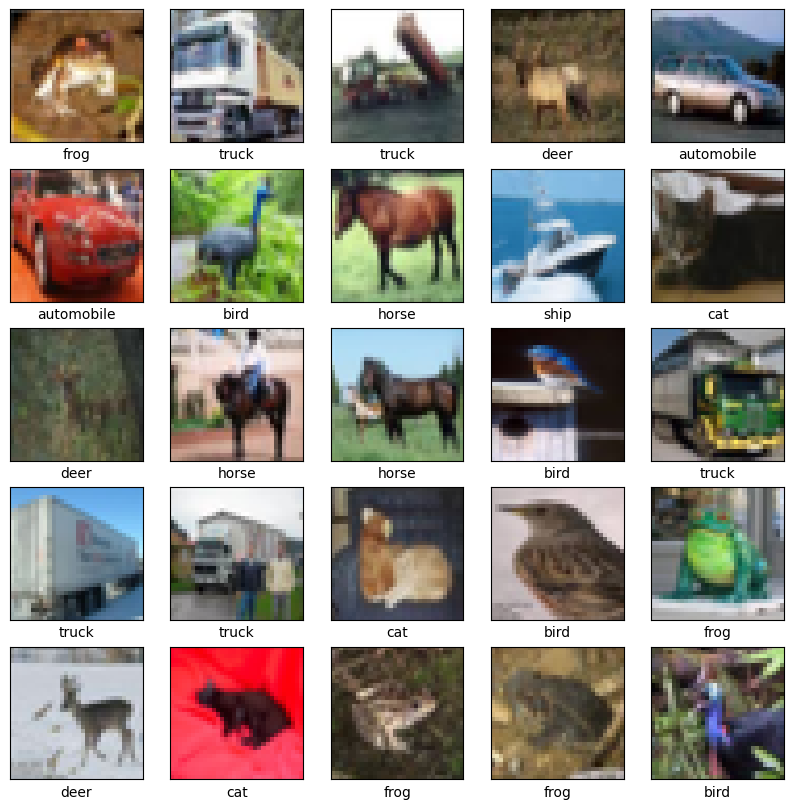

In [4]:
class_name = ['airplane', 'automobile','bird','cat','deer','dog','frog','horse','ship','truck']

plt.figure(figsize=(10,10))

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_name[train_labels[i][0]])
plt.show()

# Create CNN Model

In [5]:
model = models.Sequential()

model.add(layers.Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)))

model.add(layers.MaxPooling2D(2,2))

model.add(layers.Dropout(0.1))

model.add(layers.Conv2D(64,kernel_size=(3,3),activation='relu'))

model.add(layers.MaxPooling2D(2,2))

model.add(layers.Dropout(0.1))

model.add(layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
          
model.add(layers.Flatten())
          
model.add(layers.Dense(64,activation='relu'))

model.add(layers.Dense(10,activation='softmax'))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [6]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

# Compile and Train the Model

In [7]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

history = model.fit(train_images,train_labels,epochs=15,validation_data=(test_images,test_labels))

Epoch 1/15


2024-05-11 10:13:08.007152: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1809: 6.57455, expected 5.77917
2024-05-11 10:13:08.007199: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1873: 6.94706, expected 6.15168
2024-05-11 10:13:08.007208: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1874: 6.59592, expected 5.80054
2024-05-11 10:13:08.007216: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1877: 6.39789, expected 5.60251
2024-05-11 10:13:08.007224: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1950: 6.58588, expected 5.7905
2024-05-11 10:13:08.007232: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1970: 6.0549, expected 5.25952
2024-05-11 10:13:08.007239: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1982: 6.81896, expected 6.02358
2024-05-11 10:13:08.007247: E extern

  60/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.1210 - loss: 2.2893

I0000 00:00:1715422390.928437      70 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1553/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3555 - loss: 1.7360

2024-05-11 10:13:15.846004: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 976: 6.51374, expected 5.75429
2024-05-11 10:13:15.846068: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1050: 6.23674, expected 5.47729
2024-05-11 10:13:15.846090: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1069: 6.48415, expected 5.7247
2024-05-11 10:13:15.846108: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1100: 6.12951, expected 5.37006
2024-05-11 10:13:15.846122: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1113: 6.51051, expected 5.75106
2024-05-11 10:13:15.846133: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1115: 6.56365, expected 5.8042
2024-05-11 10:13:15.846145: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1130: 6.45302, expected 5.69357
2024-05-11 10:13:15.846156: E externa

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.3561 - loss: 1.7344 - val_accuracy: 0.5590 - val_loss: 1.2149
Epoch 2/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5831 - loss: 1.1770 - val_accuracy: 0.6272 - val_loss: 1.0576
Epoch 3/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6375 - loss: 1.0303 - val_accuracy: 0.6472 - val_loss: 0.9956
Epoch 4/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6739 - loss: 0.9346 - val_accuracy: 0.6836 - val_loss: 0.9174
Epoch 5/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7055 - loss: 0.8353 - val_accuracy: 0.6984 - val_loss: 0.8798
Epoch 6/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7239 - loss: 0.7866 - val_accuracy: 0.7077 - val_loss: 0.8428
Epoch 7/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7364 - loss: 0.7407 - val_accuracy: 0.7066 - val_loss: 0.8535
Epoch 8/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7531 - loss: 0.6963 - val_accura

# Evaluate the Model

313/313 - 0s - 2ms/step - accuracy: 0.7272 - loss: 0.8550


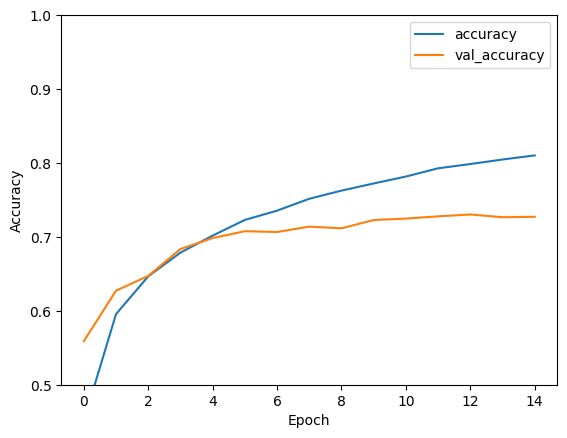

In [8]:
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='best')

test_loss, test_acc = model.evaluate(test_images,
                                     test_labels,
                                     verbose=2)

313/313 - 0s - 1ms/step - accuracy: 0.7272 - loss: 0.8550


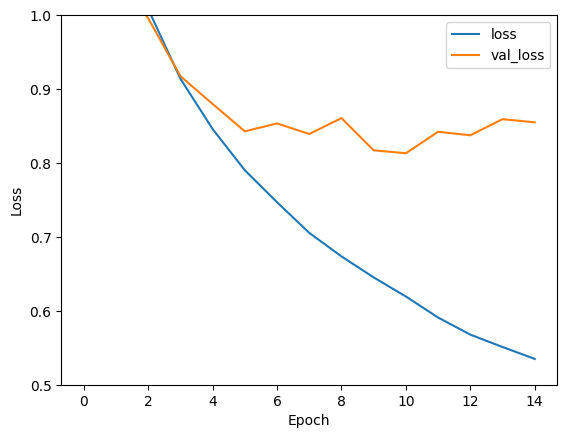

In [9]:
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0.5, 1])
plt.legend(loc='best')

test_loss, test_acc = model.evaluate(test_images,
                                     test_labels,
                                     verbose=2)

In [10]:
print('Test Accuracy is',test_acc)

Test Accuracy is 0.7271999716758728
